<a href="https://colab.research.google.com/github/AbdullahGaballah/ANN/blob/Handwritten/ANN_Handwritten_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
from keras import layers , datasets, Sequential 
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
(x_train ,y_train), (x_test ,y_test) =datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
def plot_sample(x,y,index):
  plt.imshow(x[index])
  plt.xlabel(y[index])


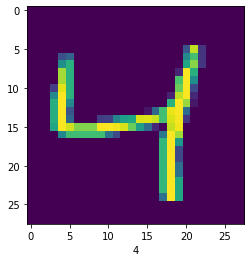

In [ ]:
plot_sample(x_train,y_train,2)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train =x_train.reshape(60000,28*28)
x_test =x_test.reshape(len(x_test),28*28)

x_train.shape

(60000, 784)

In [ ]:
x_test.shape

(10000, 784)

# **Without  hidden layer **

In [ ]:
ann = Sequential([
    layers.Dense(10,input_shape=(784,) ,activation='sigmoid'),
])
ann.compile(optimizer='adam',
            loss ='sparse_categorical_crossentropy' ,
            metrics =['accuracy'] 

            )

In [ ]:
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4662 - accuracy: 0.8791
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2661 - accuracy: 0.9260


In [ ]:
ann.evaluate(x_train, y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2685 - accuracy: 0.9237


[0.26851317286491394, 0.9236833453178406]

In [ ]:
from numpy.ma.core import argmax
y_predicted = ann.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]


In [ ]:
y_predicted_labels = np.asarray(y_predicted_labels)
y_predicted_labels.shape

(10000,)

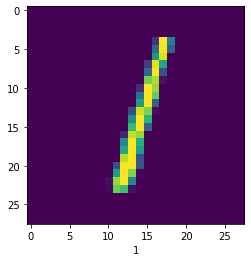

In [ ]:
x_test_plt =x_test.reshape(len(x_test),28,28)

plot_sample(x_test_plt,y_predicted_labels,2)

In [ ]:
import seaborn as sn 
def con_matric(label,pred) :
  cm = tf.math.confusion_matrix(labels=label , predictions=pred)
  plt.figure(figsize = (10,7))
  sn.heatmap(cm, annot= True ,fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')

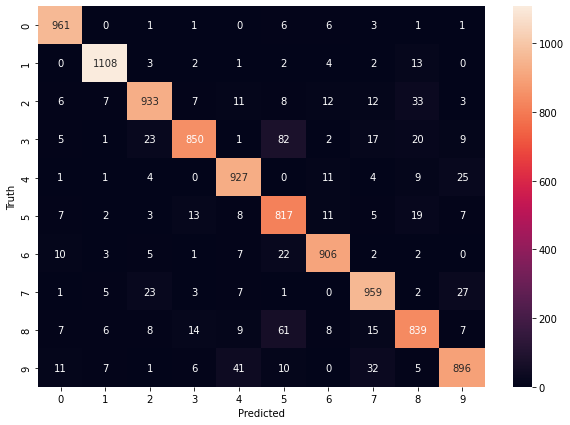

In [ ]:
con_matric(y_test ,y_predicted_labels)


# **With  hidden layer **

In [ ]:
 
ann_hidden = Sequential([
    layers.Dense(100,input_shape=(784,),activation='relu'),
    layers.Dense(10,activation='sigmoid'),


])

ann_hidden.compile(optimizer='adam',
                   loss= 'sparse_categorical_crossentropy',
                   metrics = ['accuracy']
                   
                   )

In [ ]:
ann_hidden.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2685 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1223 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0854 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0651 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0519 - accuracy: 0.9839


In [ ]:
y_predicted_h = ann_hidden.predict(x_test)
y_predicted_labels_h = [np.argmax(i) for i in y_predicted_h]


In [ ]:
y_predicted_labels_h = np.asarray(y_predicted_labels_h)
y_predicted_labels_h.shape

(10000,)

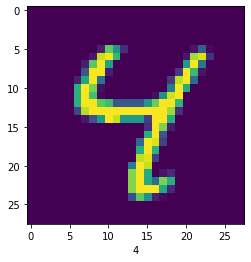

In [ ]:
x_test_plt_h =x_test.reshape(len(x_test),28,28)

plot_sample(x_test_plt_h,y_predicted_labels_h,6)

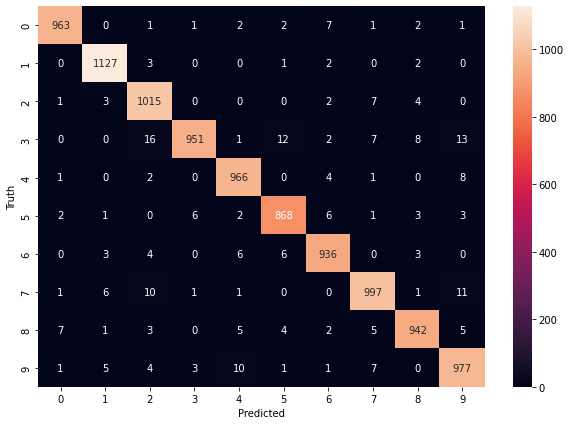

In [ ]:
con_matric (y_test ,y_predicted_labels_h)
